# Visualizing FGSM attacks on binned histone modification data
Specifically attacked AttentiveChrome, but these inputs are used for both DeepChrome, DeepDiffChrome, and many other deep learning models in genomics.

In [30]:
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

SMALL_SIZE = 30
MEDIUM_SIZE = 35
BIGGER_SIZE = 40

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Load saved data
Load a dataframe where 100 consecutive rows are the same GeneID (TODO: convert from float to int) as there are 100 bins per histone modification (HM) per gene. The 5 "O" columns are the original input data, the "A" columns are the adversarially generated (+/- 1) inputs, the "e" columns are the steps taken (epsilon) for those columns (TODO: these don't show bins that are lower bounded @ 0, maybe we want to change this to show how many get lower bounded?), and finally the "g" column is the gradient for each bin.

In [57]:
CELL_LINE = 'E100'

# load standard model
vis_output = np.load('./Results_all_fgsm/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df = pd.DataFrame(vis_output, columns=COLS)

print(len(df[df['y'] == 0.0])/len(df)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df['yho']),3), ' min:', np.round(min(df['yho']), 3), ' avg:', np.round(np.mean(df['yho']), 3))
print('Attacked predictions max:', np.round(max(df['yha']),3), ' min:', np.round(min(df['yha']), 3), ' avg:', np.round(np.mean(df['yha']), 3))

df.head()

64.13636363636364 % Labels 0
Original predictions max: 0.979  min: 0.031  avg: 0.469
Attacked predictions max: 0.986  min: 0.024  avg: 0.549


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,0.0,5.0,3.0,4.0,1.0,1.0,4.0,2.0,3.0,...,0.006841,0.007325,0.006800,0.007195,0.007523,0.007819,0.008117,1.0,0.946716,0.750064
1,172936.0,0.0,2.0,6.0,10.0,0.0,1.0,1.0,5.0,9.0,...,0.008721,0.008607,0.009079,0.008689,0.009575,0.009786,0.009809,1.0,0.946716,0.750064
2,172936.0,0.0,4.0,6.0,6.0,1.0,1.0,5.0,5.0,5.0,...,0.009302,0.009918,0.008960,0.008840,0.008846,0.008960,0.009198,1.0,0.946716,0.750064
3,172936.0,0.0,7.0,9.0,2.0,0.0,1.0,8.0,8.0,1.0,...,0.010407,0.010018,0.011133,0.010895,0.011915,0.011078,0.010748,1.0,0.946716,0.750064
4,172936.0,0.0,5.0,7.0,2.0,0.0,1.0,6.0,6.0,1.0,...,0.010332,0.009642,0.009606,0.009360,0.010071,0.010119,0.009298,1.0,0.946716,0.750064


In [58]:
# load robust model (adversarial training)
vis_output = np.load('./Results_all_adv_trained/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df_robust = pd.DataFrame(vis_output, columns=COLS)

print(len(df_robust[df_robust['y'] == 0.0])/len(df_robust)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df_robust['yho']),3), ' min:', np.round(min(df_robust['yho']), 3), ' avg:', np.round(np.mean(df_robust['yho']), 3))
print('Attacked predictions max:', np.round(max(df_robust['yha']),3), ' min:', np.round(min(df_robust['yha']), 3), ' avg:', np.round(np.mean(df_robust['yha']), 3))

df_robust.head()

64.13636363636364 % Labels 0
Original predictions max: 0.955  min: 0.085  avg: 0.453
Attacked predictions max: 0.955  min: 0.085  avg: 0.457


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,0.0,5.0,3.0,4.0,1.0,1.0,4.0,2.0,5.0,...,0.010101,0.010144,0.010685,0.010230,0.009709,0.009710,0.009926,1.0,0.944793,0.944059
1,172936.0,0.0,2.0,6.0,10.0,0.0,1.0,1.0,5.0,11.0,...,0.009978,0.009718,0.010250,0.009819,0.010330,0.009917,0.009366,1.0,0.944793,0.944059
2,172936.0,0.0,4.0,6.0,6.0,1.0,0.0,3.0,5.0,7.0,...,0.009956,0.010308,0.008843,0.009061,0.009328,0.009707,0.010381,1.0,0.944793,0.944059
3,172936.0,0.0,7.0,9.0,2.0,0.0,0.0,6.0,8.0,3.0,...,0.009617,0.009471,0.011208,0.010389,0.010137,0.009134,0.008698,1.0,0.944793,0.944059
4,172936.0,0.0,5.0,7.0,2.0,0.0,0.0,4.0,6.0,3.0,...,0.009699,0.009552,0.009052,0.009545,0.009968,0.009461,0.009010,1.0,0.944793,0.944059


In [59]:
# load thresh9 model (thresh training)
vis_output = np.load('./Results_all_threshold_trained/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df_thresh9 = pd.DataFrame(vis_output, columns=COLS)

print(len(df_thresh9[df_robust['y'] == 0.0])/len(df_thresh9)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df_thresh9['yho']),3), ' min:', np.round(min(df_thresh9['yho']), 3), ' avg:', np.round(np.mean(df_thresh9['yho']), 3))
print('Attacked predictions max:', np.round(max(df_thresh9['yha']),3), ' min:', np.round(min(df_thresh9['yha']), 3), ' avg:', np.round(np.mean(df_thresh9['yha']), 3))

df_thresh9.head()

64.13636363636364 % Labels 0
Original predictions max: 0.965  min: 0.121  avg: 0.509
Attacked predictions max: 0.963  min: 0.128  avg: 0.508


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,0.0,5.0,3.0,4.0,1.0,0.0,5.0,3.0,4.0,...,0.012859,0.012705,0.013404,0.013210,0.013027,0.012859,0.012705,1.0,0.886738,0.879531
1,172936.0,0.0,2.0,6.0,10.0,0.0,0.0,2.0,6.0,9.0,...,0.012201,0.012097,0.012563,0.012433,0.012313,0.012201,0.012097,1.0,0.886738,0.879531
2,172936.0,0.0,4.0,6.0,6.0,1.0,0.0,4.0,6.0,6.0,...,0.011730,0.011648,0.011998,0.011904,0.011815,0.011730,0.011648,1.0,0.886738,0.879531
3,172936.0,0.0,7.0,9.0,2.0,0.0,0.0,7.0,9.0,2.0,...,0.011345,0.011274,0.011569,0.011492,0.011418,0.011345,0.011274,1.0,0.886738,0.879531
4,172936.0,0.0,5.0,7.0,2.0,0.0,0.0,5.0,7.0,2.0,...,0.011003,0.010938,0.011204,0.011136,0.011069,0.011003,0.010938,1.0,0.886738,0.879531


In [60]:
# load thresh9 model (thresh TESTING)
vis_output = np.load('./Results_all_threshold_test_only/' + CELL_LINE + 'vis_output.npy')
COLS = (['GeneID',
         'O1','O2','O3','O4','O5',
         'A1','A2','A3','A4','A5',
         'e1','e2','e3','e4','e5',
         'g1','g2','g3','g4','g5',
         'ao1', 'ao2', 'ao3', 'ao4', 'ao5',
         'a1','a2','a3','a4','a5',
         'y','yho','yha',
        ])

df_thresh9test = pd.DataFrame(vis_output, columns=COLS)

print(len(df_thresh9test[df_robust['y'] == 0.0])/len(df_thresh9test)*100, '% Labels 0')
print('Original predictions max:', np.round(max(df_thresh9test['yho']),3), ' min:', np.round(min(df_thresh9test['yho']), 3), ' avg:', np.round(np.mean(df_thresh9test['yho']), 3))
print('Attacked predictions max:', np.round(max(df_thresh9test['yha']),3), ' min:', np.round(min(df_thresh9test['yha']), 3), ' avg:', np.round(np.mean(df_thresh9test['yha']), 3))

df_thresh9test.head()

64.13636363636364 % Labels 0
Original predictions max: 0.985  min: 0.061  avg: 0.519
Attacked predictions max: 0.985  min: 0.078  avg: 0.517


,GeneID,O1,O2,O3,O4,O5,A1,A2,A3,A4,...,ao4,ao5,a1,a2,a3,a4,a5,y,yho,yha
0,172936.0,0.0,5.0,3.0,4.0,1.0,0.0,5.0,3.0,4.0,...,0.009906,0.009884,0.009975,0.009960,0.009933,0.009906,0.009884,1.0,0.905541,0.900745
1,172936.0,0.0,2.0,6.0,10.0,0.0,0.0,2.0,6.0,11.0,...,0.009840,0.009835,0.009867,0.009854,0.009846,0.009840,0.009835,1.0,0.905541,0.900745
2,172936.0,0.0,4.0,6.0,6.0,1.0,0.0,4.0,6.0,6.0,...,0.009829,0.009828,0.009833,0.009831,0.009829,0.009829,0.009828,1.0,0.905541,0.900745
3,172936.0,0.0,7.0,9.0,2.0,0.0,0.0,7.0,9.0,2.0,...,0.009827,0.009827,0.009828,0.009827,0.009827,0.009827,0.009827,1.0,0.905541,0.900745
4,172936.0,0.0,5.0,7.0,2.0,0.0,0.0,5.0,7.0,2.0,...,0.009827,0.009827,0.009827,0.009827,0.009827,0.009827,0.009827,1.0,0.905541,0.900745


### Plot distribution of predictions before and after attack
- plot original, adv trained & threshold input trained

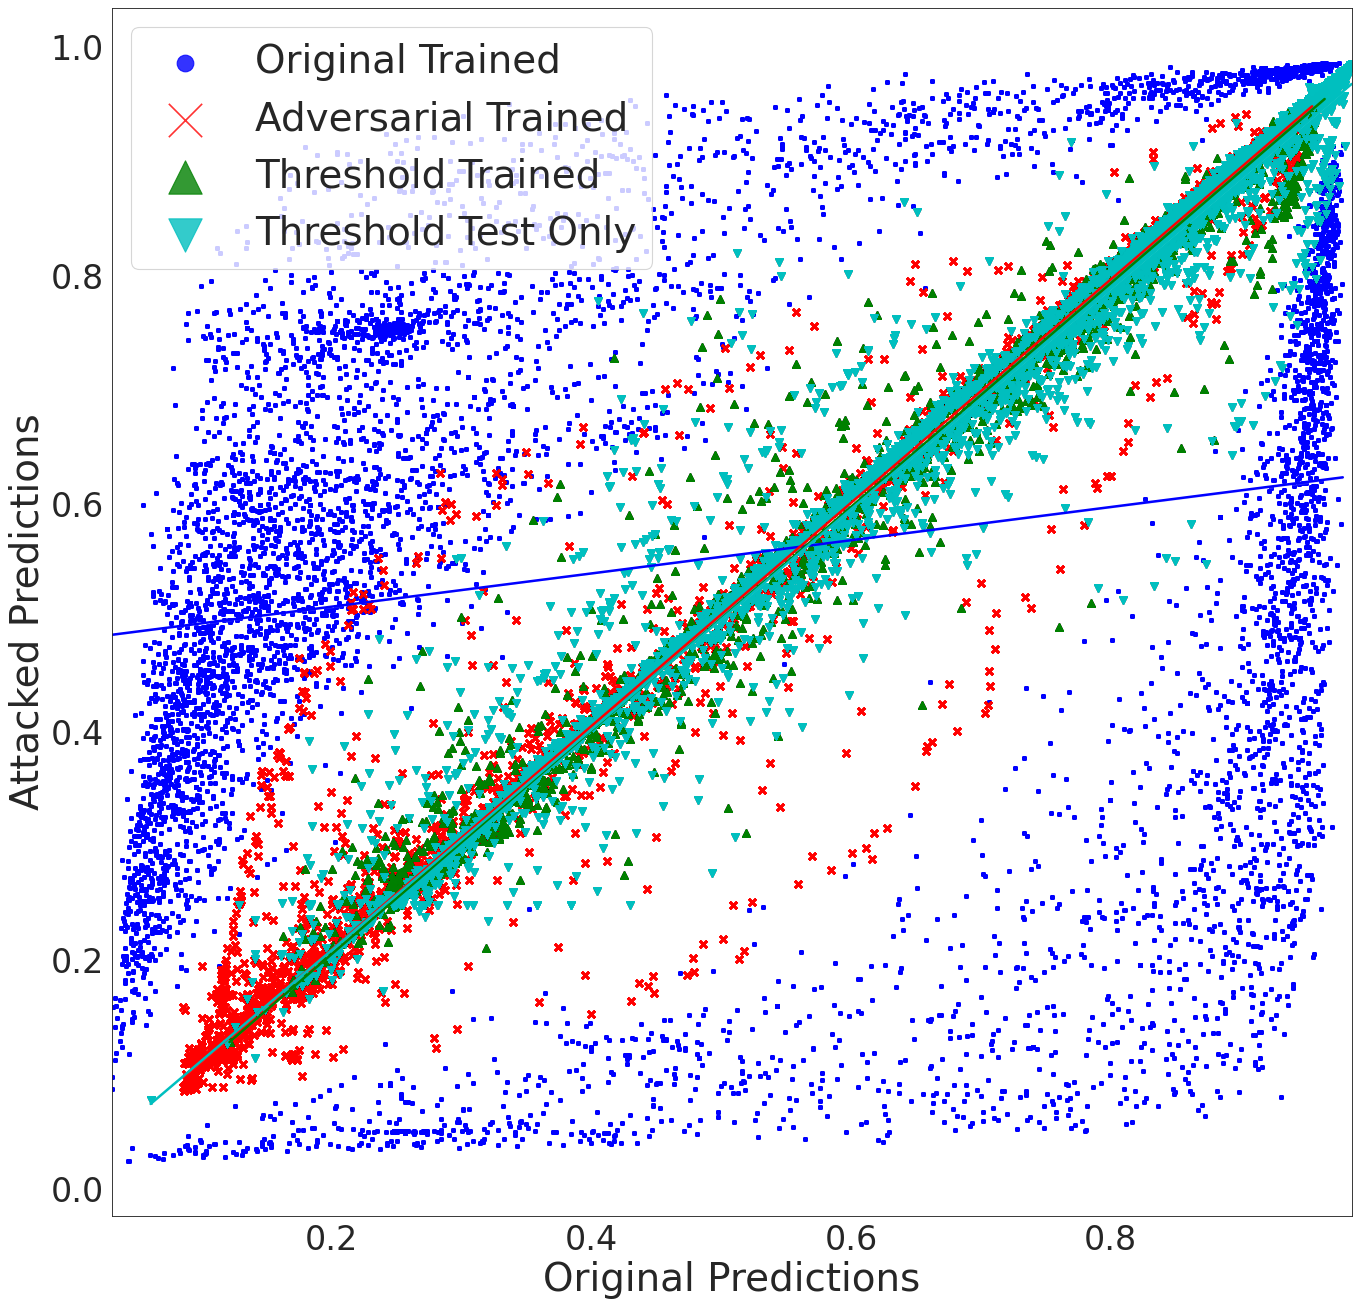

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
sns.set_style(style='white') #style='white' or 'darkgrid'
#plt.xlabel("Gene Expression Predictions (Sigmoid Output)")
#plt.ylabel("Frequency")
plt.xlabel("Original Predictions")
plt.ylabel("Attacked Predictions")
sns.regplot(x=np.array(df['yho']), y=np.array(df['yha']), color='b', marker='.', label='Original Trained')
sns.regplot(x=np.array(df_robust['yho']), y=np.array(df_robust['yha']), color='r', marker='x', label='Adversarial Trained')
sns.regplot(x=np.array(df_thresh9['yho']), y=np.array(df_thresh9['yha']), color='g', marker='^', label='Threshold Trained')
sns.regplot(x=np.array(df_thresh9test['yho']), y=np.array(df_thresh9test['yha']), color='c', marker='v', label='Threshold Test Only')
#sns.distplot(np.array(df['yho']), label="Original Predictions")
#sns.distplot(np.array(df['yha']), label="Attacked Predictions")
plt.legend(loc="upper left", markerscale=5)

plt.savefig(CELL_LINE + '_pred_dist')
plt.show()
plt.cla()   # Clear axis
plt.clf()   # Clear figure

Let's find the points with the most extreme and least extreme prediction changes in both directions.

In [62]:
g1 = int(np.argmax(np.array(df['yha'])-np.array(df['yho']))/100)
print(g1, np.max(np.array(df['yha'])-np.array(df['yho'])))
g2 = int(np.argmin(np.array(df['yha'])-np.array(df['yho']))/100)
print(g2, np.min(np.array(df['yha'])-np.array(df['yho'])))
g3 = int(np.argmin(np.abs(np.array(df['yha'])-np.array(df['yho'])))/100)
print(g3, np.min(np.abs(np.array(df['yha'])-np.array(df['yho']))))

2830 0.7333305776119232
3599 -0.8508314043283463
6411 0.00995326042175293


Now lets load attack and original beta attention maps as well (saved to a txt file):

In [63]:
beta_df = pd.read_csv('./Results_all_fgsm/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
beta_df.head()

orig_beta_df = pd.read_csv('./Results_all_fgsm/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df.head()

,1,2,3,4,5
0,,,,,
172936,0.086138,0.196713,0.274024,0.304816,0.138309
172938,0.184194,0.201915,0.260435,0.158120,0.195335
172939,0.091669,0.210472,0.270345,0.298536,0.128977
172940,0.150274,0.212253,0.296346,0.170334,0.170793
172943,0.139119,0.178591,0.263730,0.228479,0.190081


In [64]:
beta_df_robust = pd.read_csv('./Results_all_adv_trained/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
beta_df_robust.head()

orig_beta_df_robust = pd.read_csv('./Results_all_adv_trained/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df_robust.head()

,1,2,3,4,5
0,,,,,
172936,0.063463,0.090103,0.165522,0.585304,0.095607
172938,0.253166,0.141866,0.208784,0.148741,0.247443
172939,0.062896,0.090074,0.164945,0.588791,0.093293
172940,0.200996,0.167157,0.264902,0.142005,0.224939
172943,0.047466,0.048705,0.116273,0.446834,0.340723


In [65]:
beta_df_thresh9 = pd.read_csv('./Results_all_threshold_trained/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
beta_df_thresh9.head()

orig_beta_df_thresh9 = pd.read_csv('./Results_all_threshold_trained/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df_thresh9.head()

,1,2,3,4,5
0,,,,,
172936,0.194549,0.174644,0.197955,0.248820,0.184032
172938,0.206485,0.213917,0.187797,0.175914,0.215887
172939,0.203601,0.181632,0.189805,0.241708,0.183253
172940,0.205412,0.212892,0.188880,0.176170,0.216646
172943,0.212508,0.195163,0.187648,0.208957,0.195724


In [66]:
beta_df_thresh9test = pd.read_csv('./Results_all_threshold_test_only/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/beta_attention.txt', header=None, index_col=0)
orig_beta_df_thresh9test = pd.read_csv('./Results_all_threshold_test_only/' + CELL_LINE + '/' + CELL_LINE + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
orig_beta_df_thresh9test.head()

,1,2,3,4,5
0,,,,,
172936,0.145819,0.132632,0.219741,0.301290,0.200517
172938,0.219883,0.210798,0.233491,0.141575,0.194253
172939,0.152690,0.139097,0.213334,0.292980,0.201898
172940,0.219115,0.210041,0.235936,0.141186,0.193723
172943,0.205321,0.194112,0.237951,0.184402,0.178215


### scatter plots of the HM-level attentions

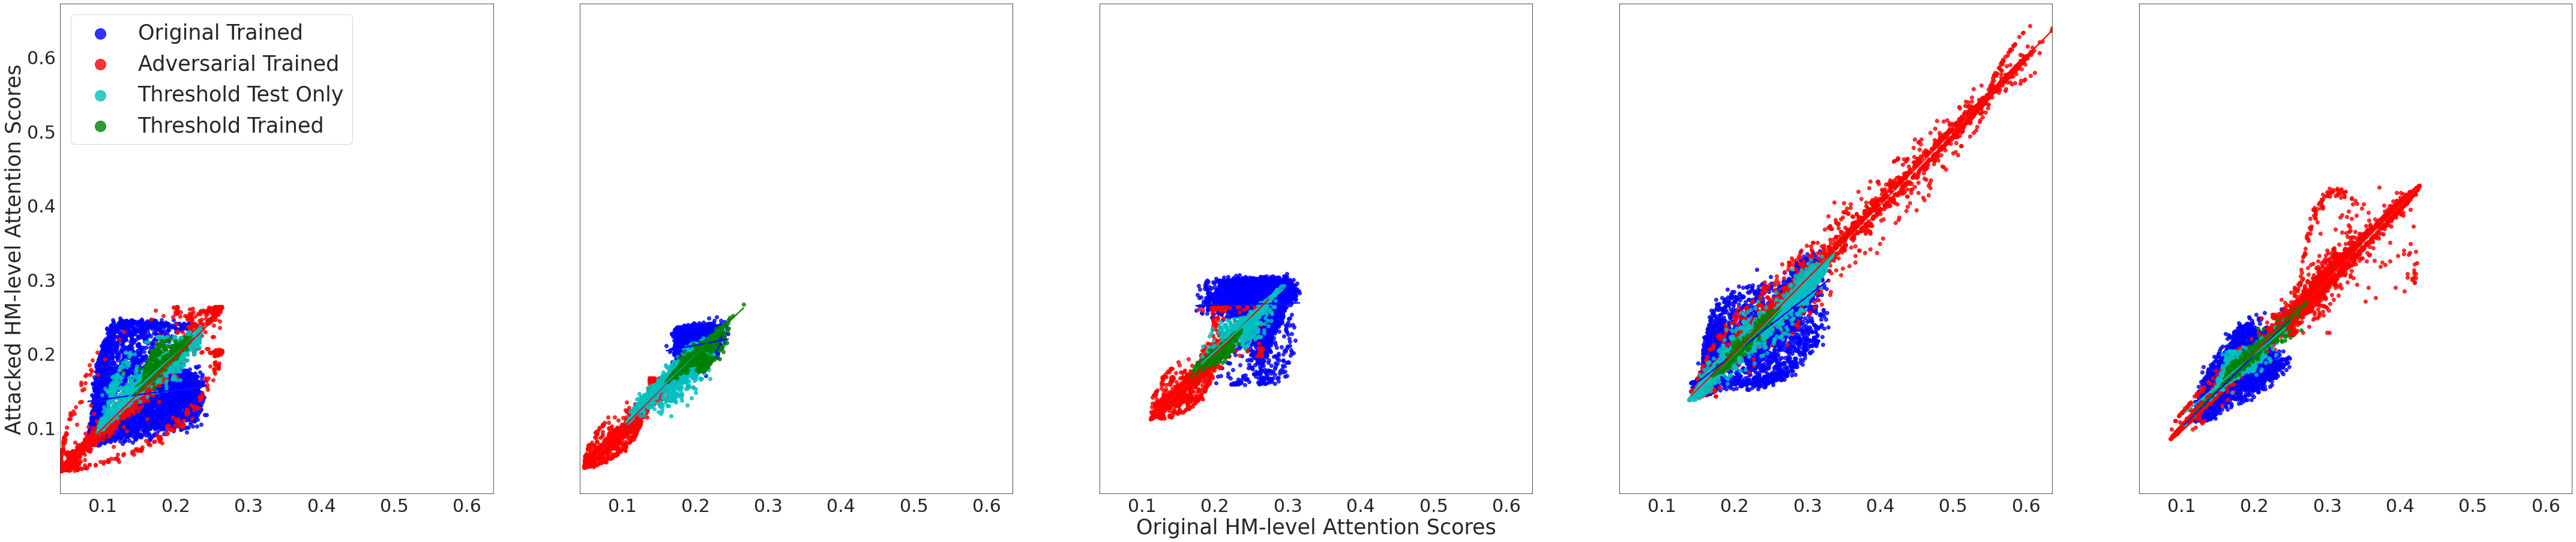

<Figure size 432x288 with 0 Axes>

In [67]:
fig, axes = plt.subplots(1, 5, figsize=(75,15), sharex = True, sharey = True, facecolor='w', edgecolor='k')
sns.set_style(style='white') #style='white' or 'darkgrid'
plt.sca(axes[2])
plt.xlabel("Original HM-level Attention Scores")

plt.sca(axes[0])
plt.ylabel("Attacked HM-level Attention Scores")

for i in range(5):
    sns.regplot(x=np.array(orig_beta_df[i+1]), y=np.array(beta_df[i+1]), color='b', label='Original Trained', ax=axes[i])
    sns.regplot(x=np.array(orig_beta_df_robust[i+1]), y=np.array(beta_df_robust[i+1]), color='r', label='Adversarial Trained', ax=axes[i])
    sns.regplot(x=np.array(orig_beta_df_thresh9test[i+1]), y=np.array(beta_df_thresh9test[i+1]), color='c', label='Threshold Test Only', ax=axes[i])
    sns.regplot(x=np.array(orig_beta_df_thresh9[i+1]), y=np.array(beta_df_thresh9[i+1]), color='g', label='Threshold Trained', ax=axes[i])

plt.sca(axes[0])
plt.legend(loc="upper left", markerscale=3)

plt.savefig(CELL_LINE + '_HM-attn')
plt.show()
plt.cla()   # Clear axis
plt.clf()   # Clear figure

## Specific gene in specific cell line detailed analysis

NOTES:
- it seems most of the bins are non-peaks, maybe thats why non-peak area attacks have a much larger effect - there are just more of them.
- as expected, the adversarial example looks identical - crazy how it performs so much worse.
- seems there is noticable, but very, very slight change in attention - corresponds to max peak region!
- it seems the FGSM attack just moves the confidence in direction away from the mean by small amounts --> all predictions that were originally close to the mean will flip and all incorrect predictions will become even more incorrect.
- ALPHA-ATTENTION TELLS US NOTHING - get rid of it in final plot for report!

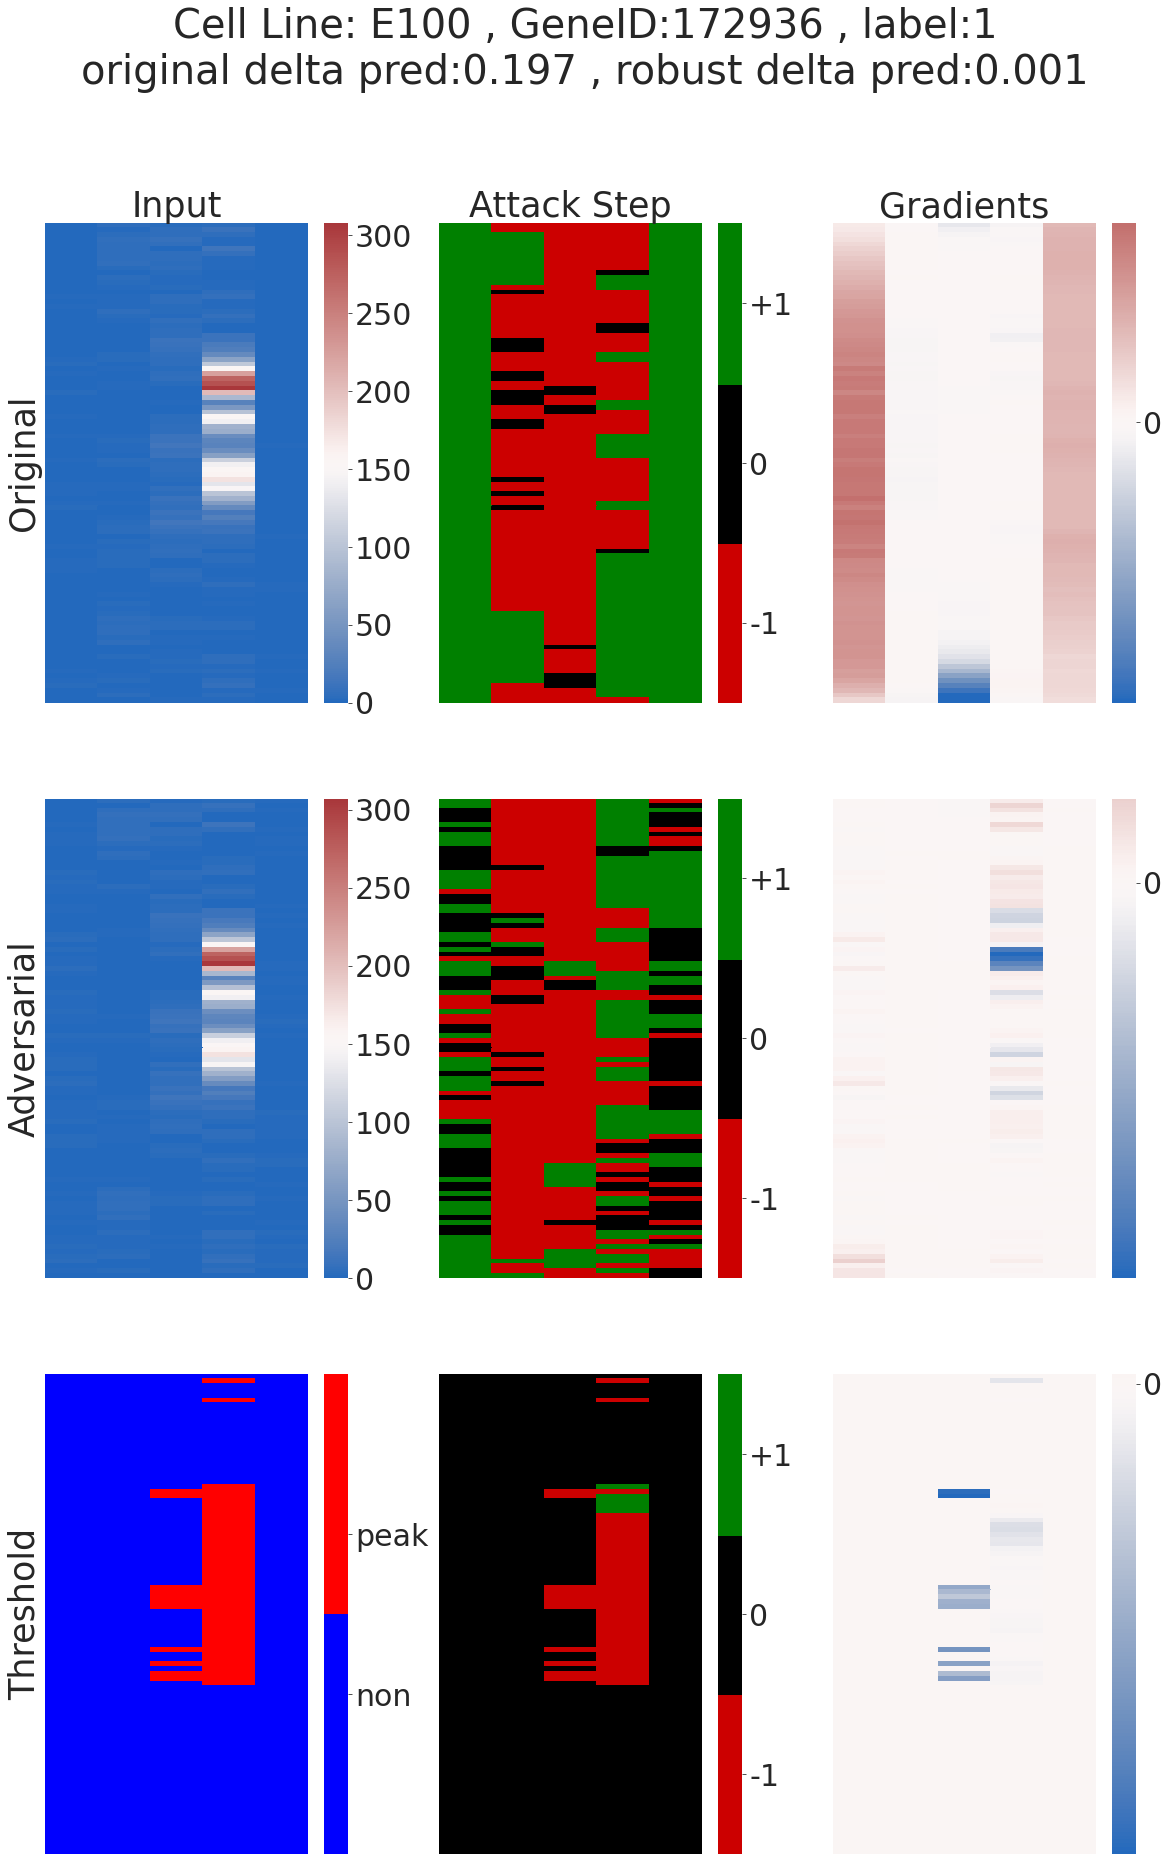

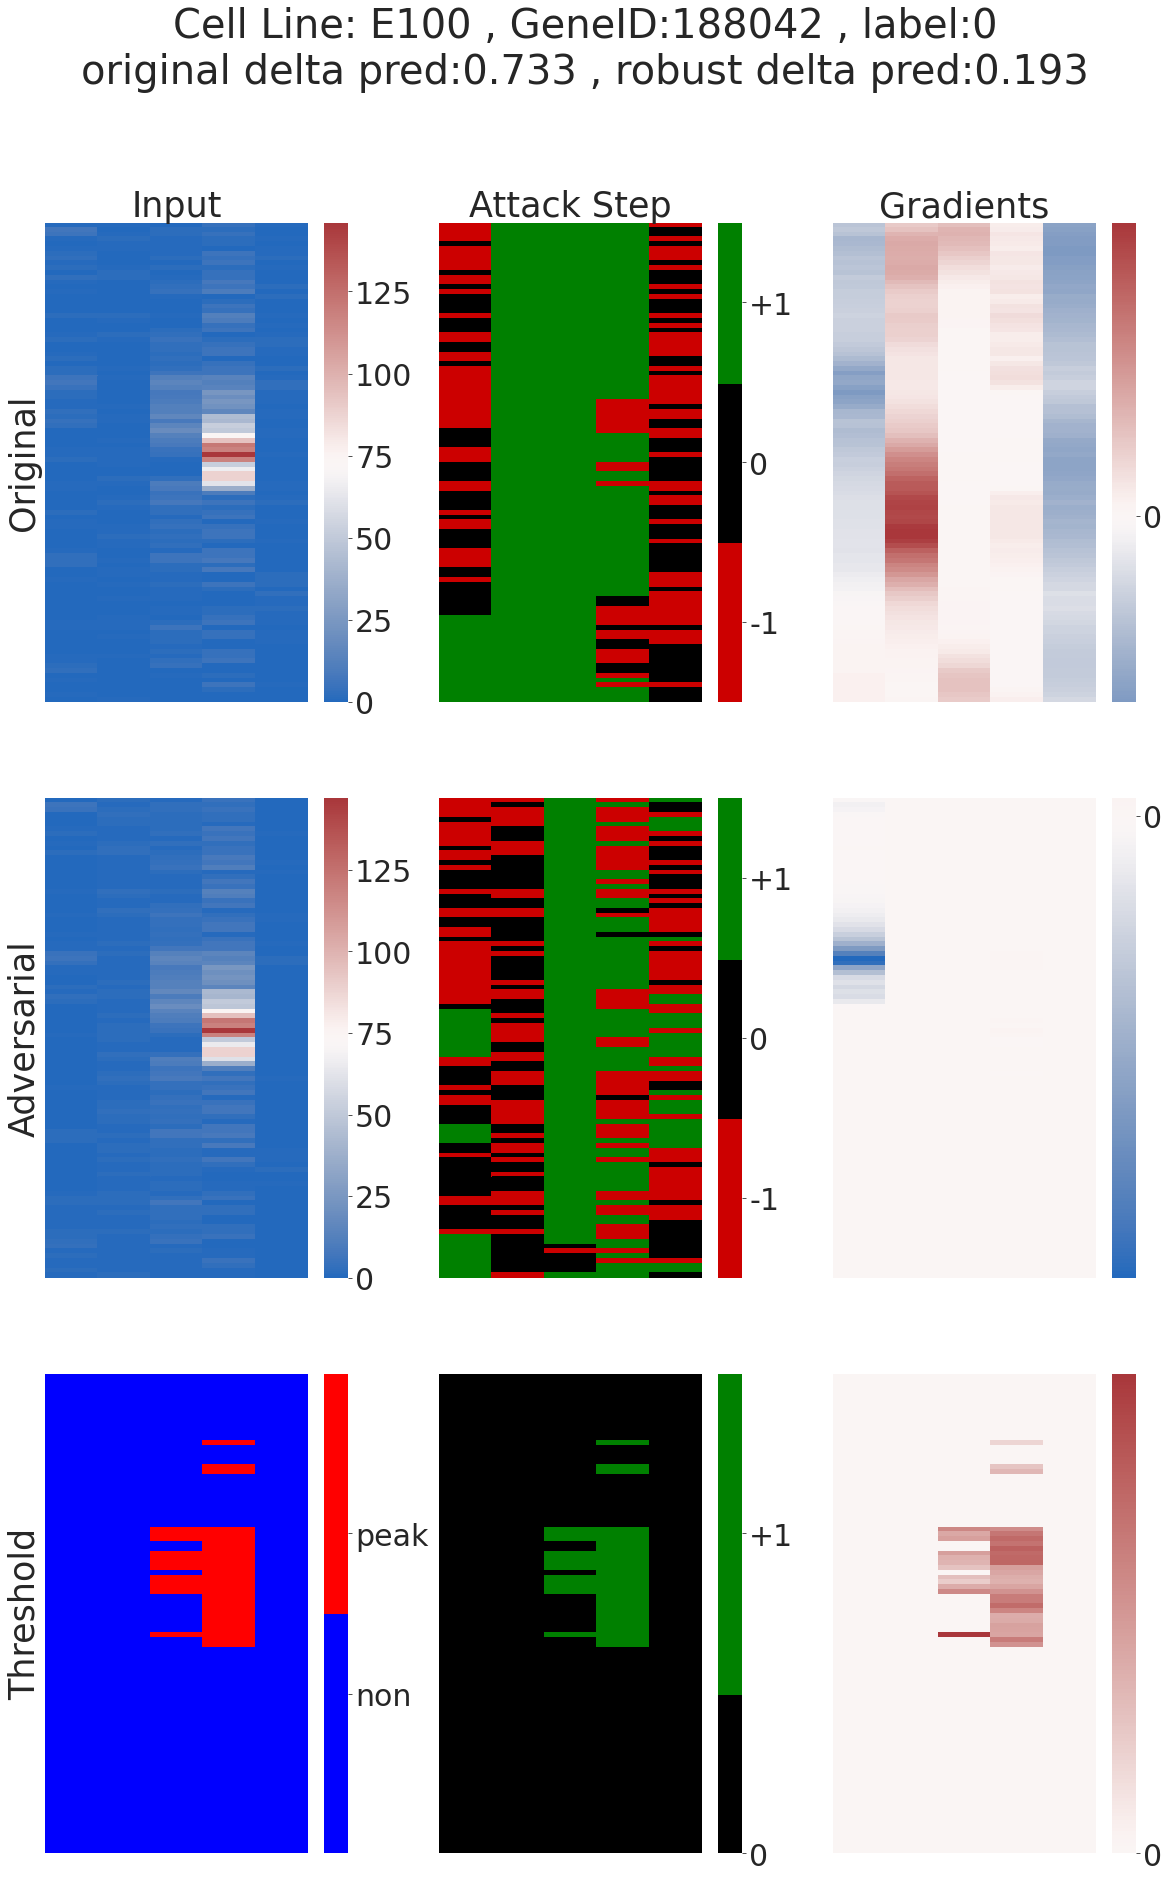

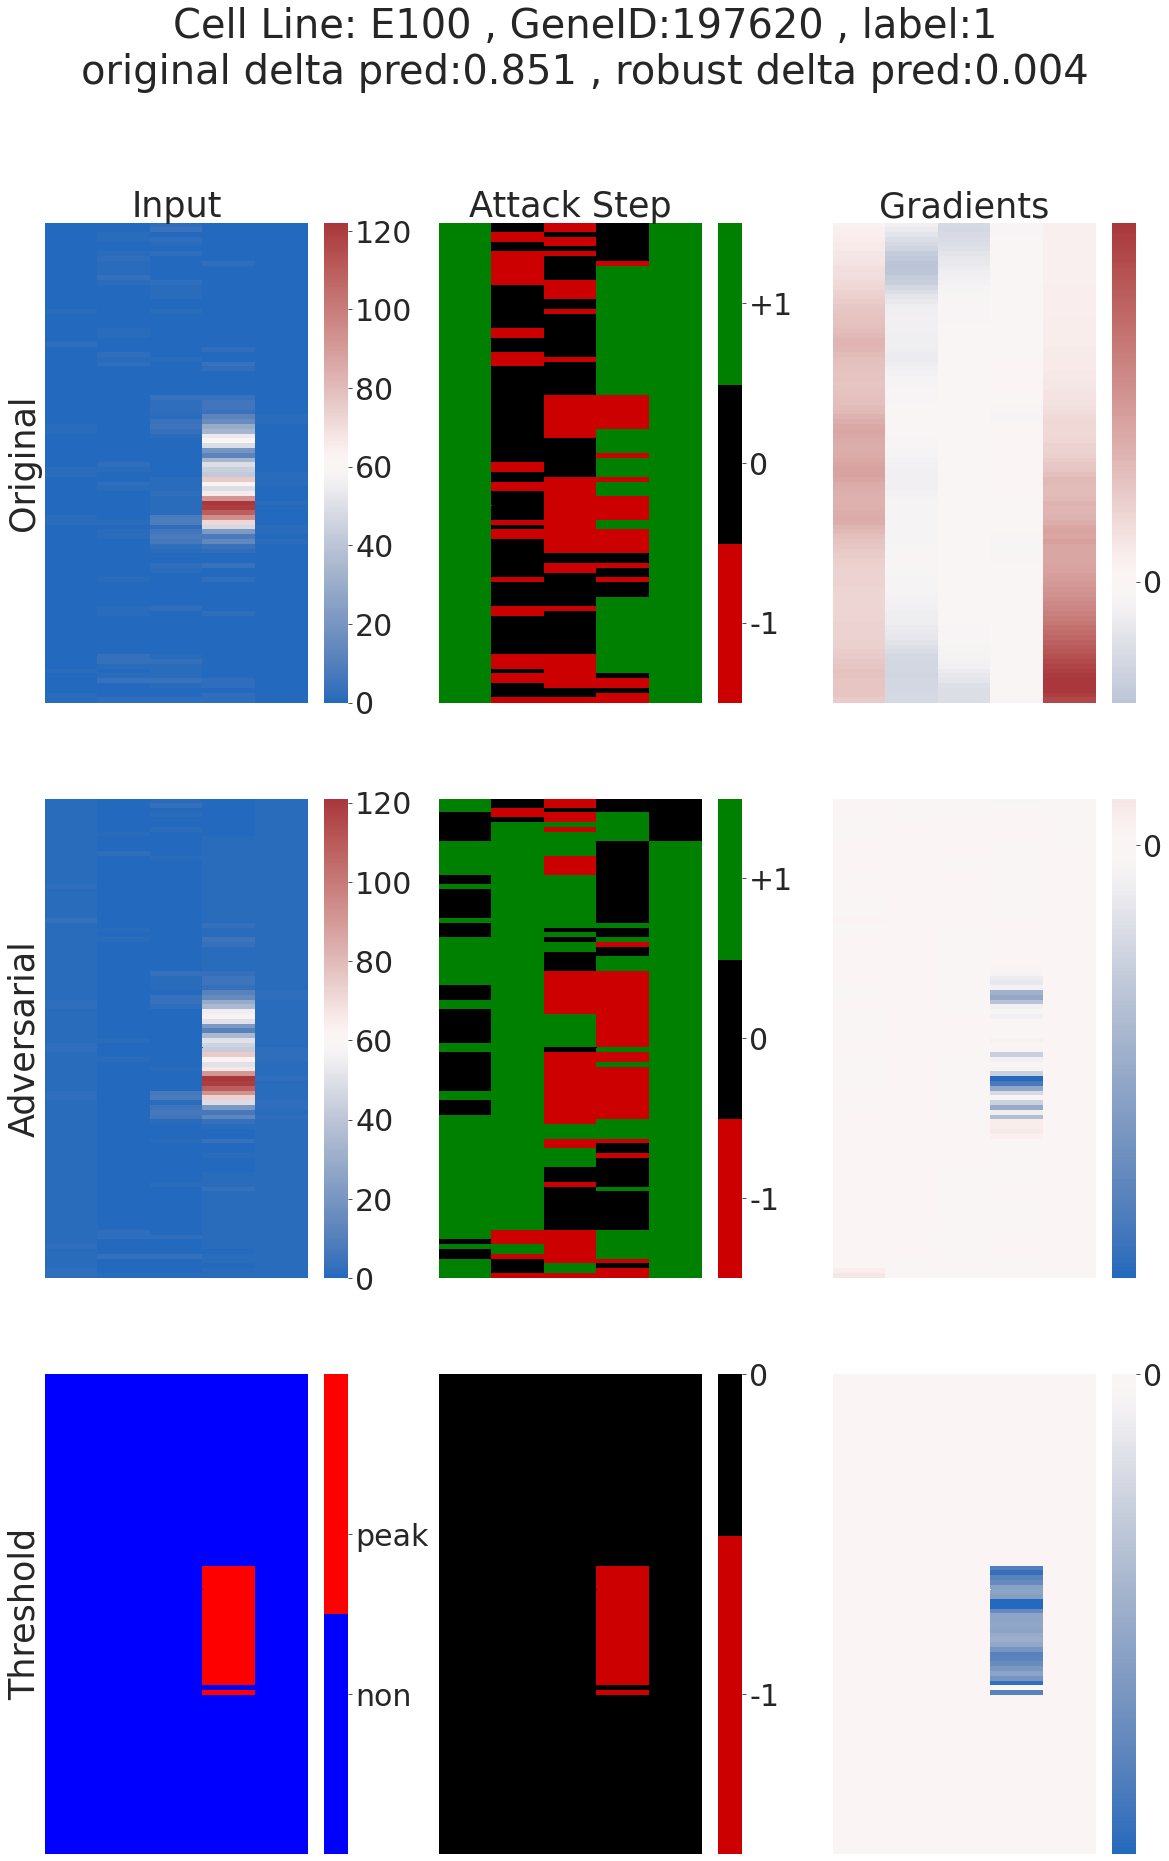

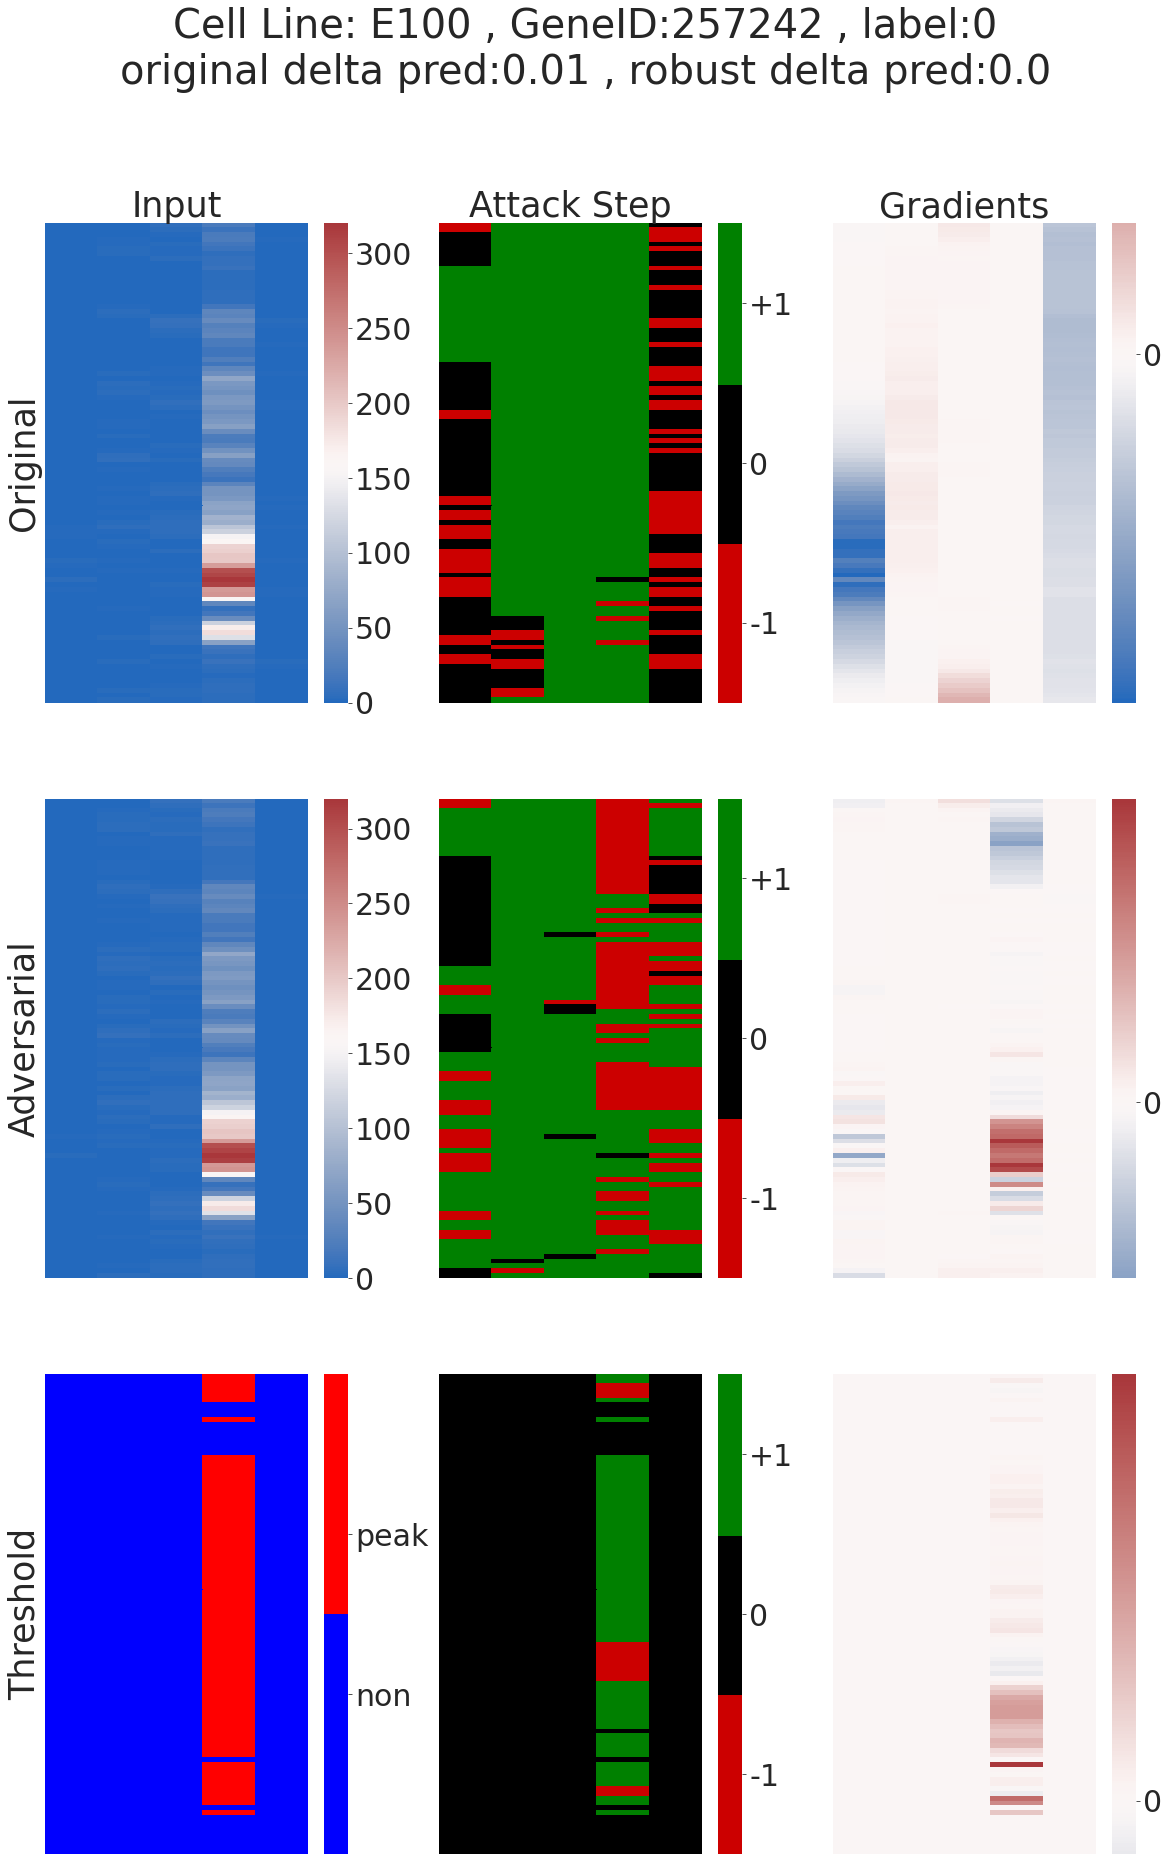

In [68]:
# CHOOSE WHICH GENE TO PLOT (number in range from 0-6599)
GENE_INDEXs = [0, g1, g2, g3]

for GENE_INDEX in GENE_INDEXs:
    g_ind = GENE_INDEX*100

    fig, axes = plt.subplots(3, 3, figsize=(20,30))
    fig.suptitle('Cell Line: ' + CELL_LINE + ' , GeneID:' + str(int(df['GeneID'].iloc[g_ind])) + ' , label:' 
                 + str(int(df['y'].iloc[g_ind])) + '\n' + 'original delta pred:' + str(np.abs(np.round(df['yho'].iloc[g_ind]-df['yha'].iloc[g_ind], 3)))
                 + ' , robust delta pred:' + str(np.abs(np.round(df_robust['yho'].iloc[g_ind]-df_robust['yha'].iloc[g_ind], 3))))
    axes[0,0].set_title('Input')
    #axes[1,0].set_title('Adversarial Input')
    #axes[2,0].set_title('Thresholded Input')
    axes[0,1].set_title('Attack Step')
    axes[0,2].set_title('Gradients')
    #axes[0,5].set_title('Original Attention')
    #axes[0,6].set_title('Attacked Attention')
    #for i in range(3):
    #    axes[0,i].set_ylabel('Original')

    myColors = ((0.8, 0.0, 0.0, 1.0), "black", "green")
    cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    binary_cmap = LinearSegmentedColormap.from_list('Custom', ('blue','red'), 2)

    sns.heatmap(df[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, yticklabels=False, ax=axes[0,0])
    sns.heatmap(df[['A1','A2','A3','A4','A5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, yticklabels=False, ax=axes[1,0])
    sns.heatmap(np.array(df[['O1','O2','O3','O4','O5']].iloc[g_ind:(g_ind+100)] > 9), cmap=binary_cmap, xticklabels=False, yticklabels=False, ax=axes[2,0])
    sns.heatmap(df[['e1','e2','e3','e4','e5']].iloc[g_ind:(g_ind+100)], cmap=cmap, center=0,xticklabels=False, yticklabels=False, ax=axes[0,1])
    sns.heatmap(df[['g1','g2','g3','g4','g5']].iloc[g_ind:(g_ind+100)], cmap="vlag", center=0, cbar_kws={"ticks":[0]}, xticklabels=False, yticklabels=False, ax=axes[0,2])
    #sns.heatmap(df[['ao1', 'ao2', 'ao3', 'ao4', 'ao5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[0,5])
    #sns.heatmap(df[['a1','a2','a3','a4','a5']].iloc[g_ind:(g_ind+100)], cmap="vlag", xticklabels=False, ax=axes[0,6])

    sns.heatmap(df_robust[['e1','e2','e3','e4','e5']].iloc[g_ind:(g_ind+100)], cmap=cmap, center=0,xticklabels=False, yticklabels=False, ax=axes[1,1])
    sns.heatmap(df_robust[['g1','g2','g3','g4','g5']].iloc[g_ind:(g_ind+100)], cmap="vlag", center=0, cbar_kws={"ticks":[0]}, xticklabels=False, yticklabels=False, ax=axes[1,2])

    sns.heatmap(df_thresh9[['e1','e2','e3','e4','e5']].iloc[g_ind:(g_ind+100)], cmap=cmap, center=0,xticklabels=False, yticklabels=False, ax=axes[2,1])
    sns.heatmap(df_thresh9[['g1','g2','g3','g4','g5']].iloc[g_ind:(g_ind+100)], cmap="vlag", center=0, cbar_kws={"ticks":[0]}, xticklabels=False, yticklabels=False, ax=axes[2,2])

    colorbar_binary = axes[2,0].collections[0].colorbar
    colorbar_binary.set_ticks([0.667, 0.333])
    colorbar_binary.set_ticklabels(['peak', 'non'])

    for i in range(3):
        colorbar = axes[i,1].collections[0].colorbar
        colorbar.set_ticks([0.667, 0, -0.667])
        colorbar.set_ticklabels(['+1', '0', '-1'])

    axes[0,0].set(ylabel='Original')
    axes[1,0].set(ylabel='Adversarial')
    axes[2,0].set(ylabel='Threshold')
    
    plt.savefig(CELL_LINE + '_' + str(int(df['GeneID'].iloc[g_ind])))


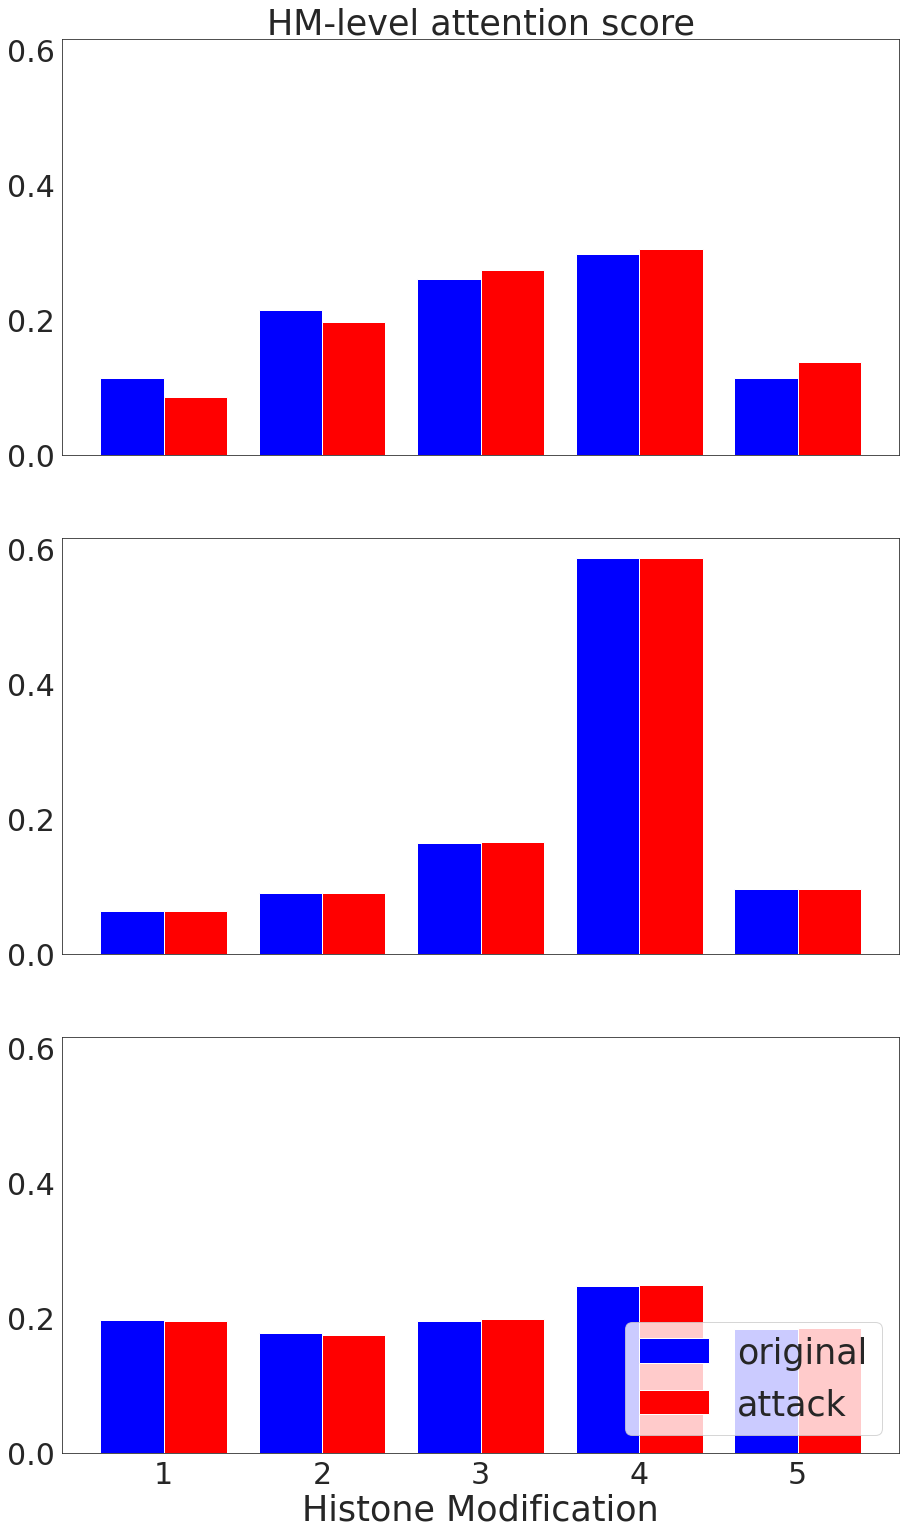

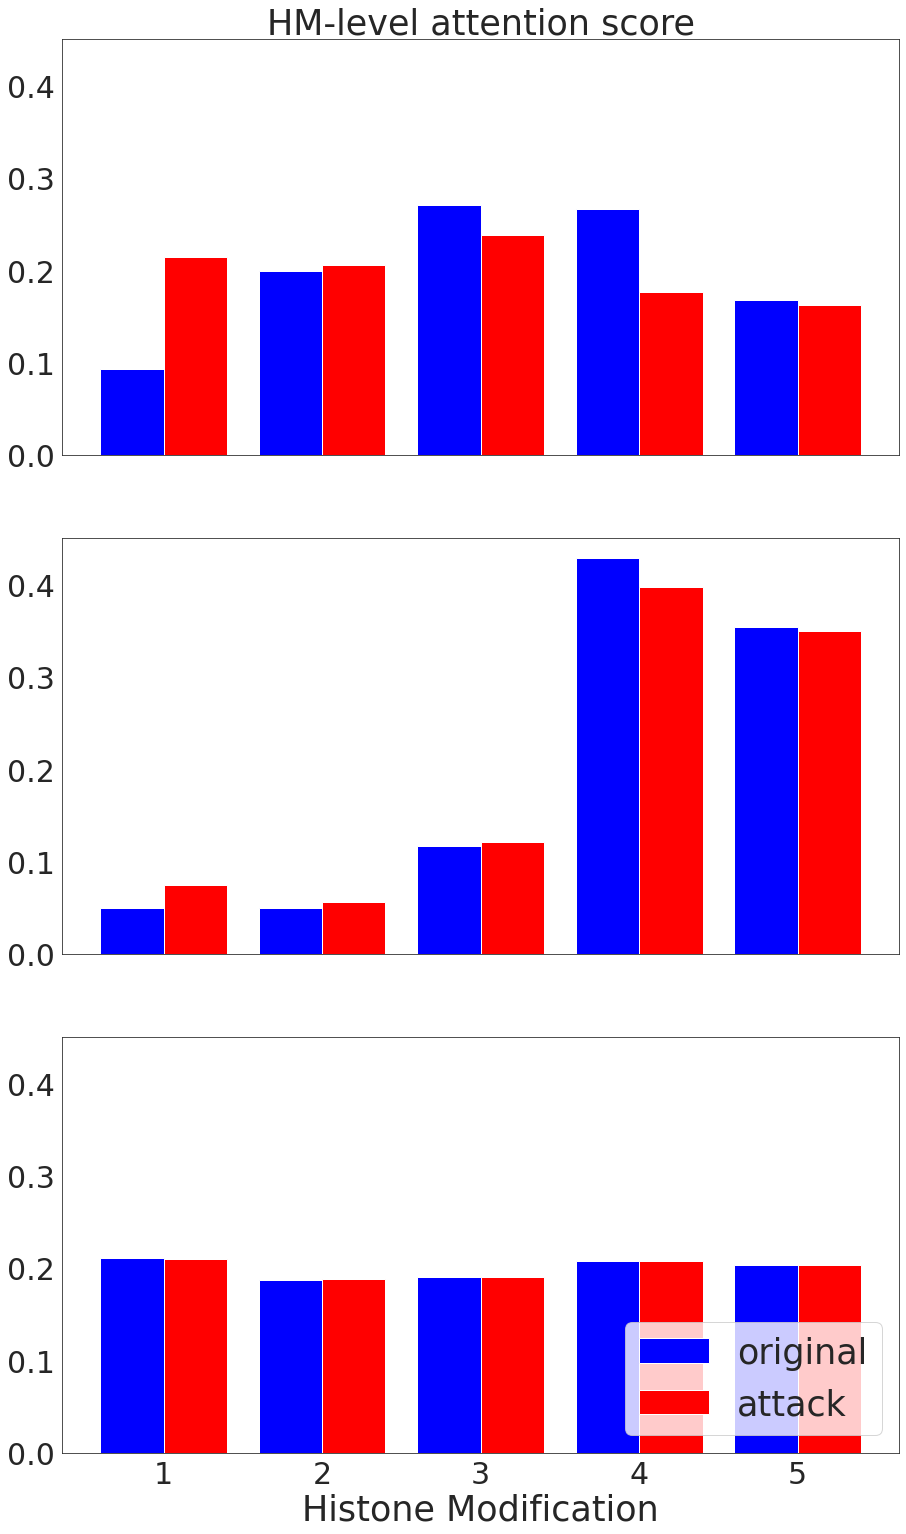

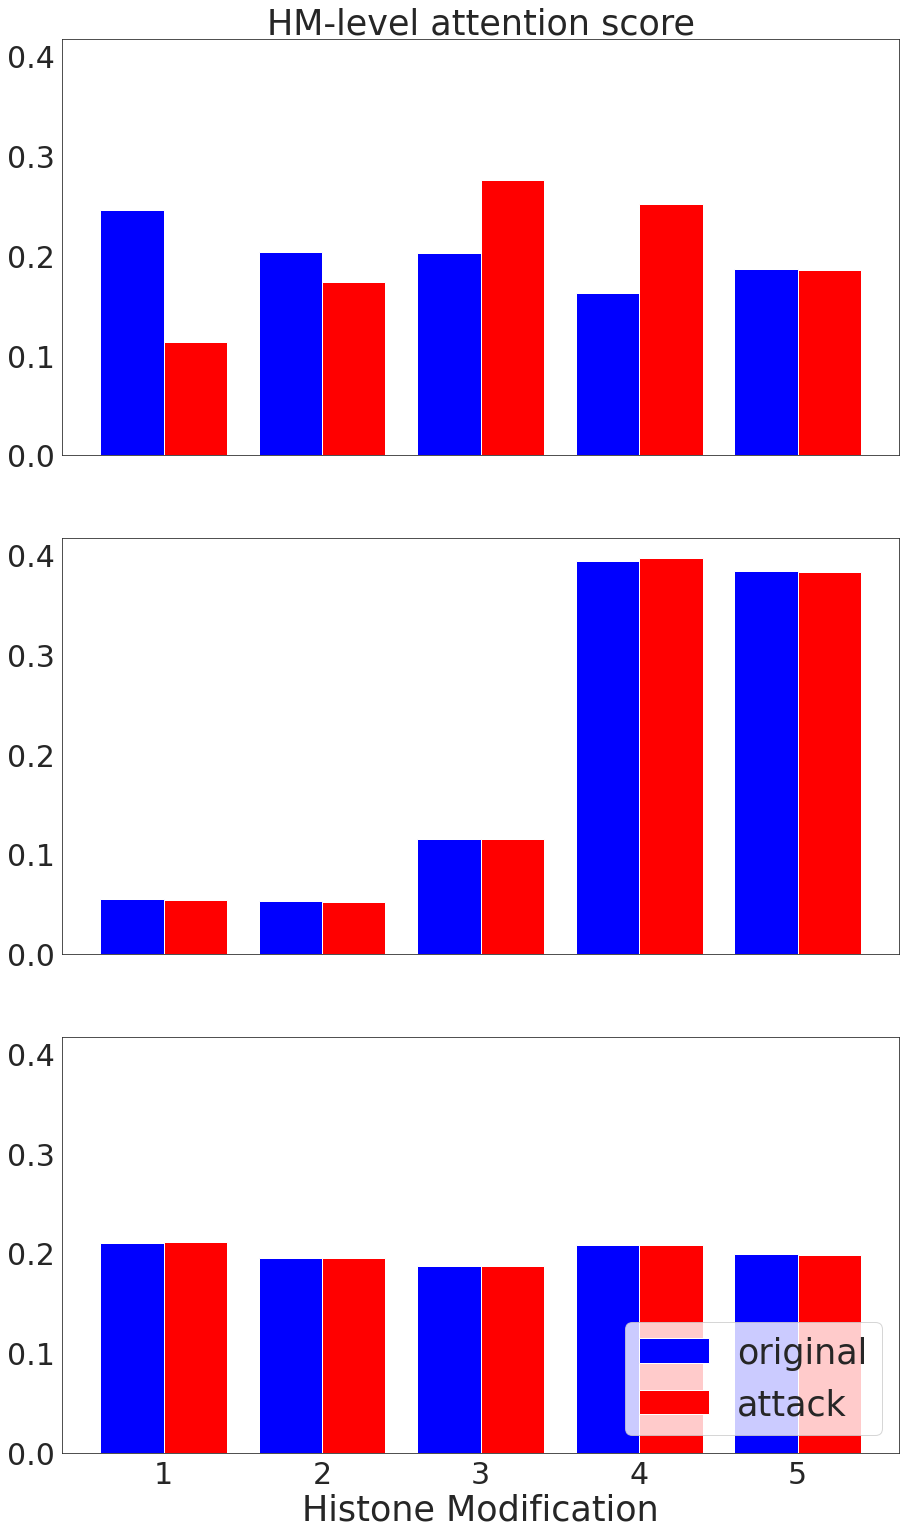

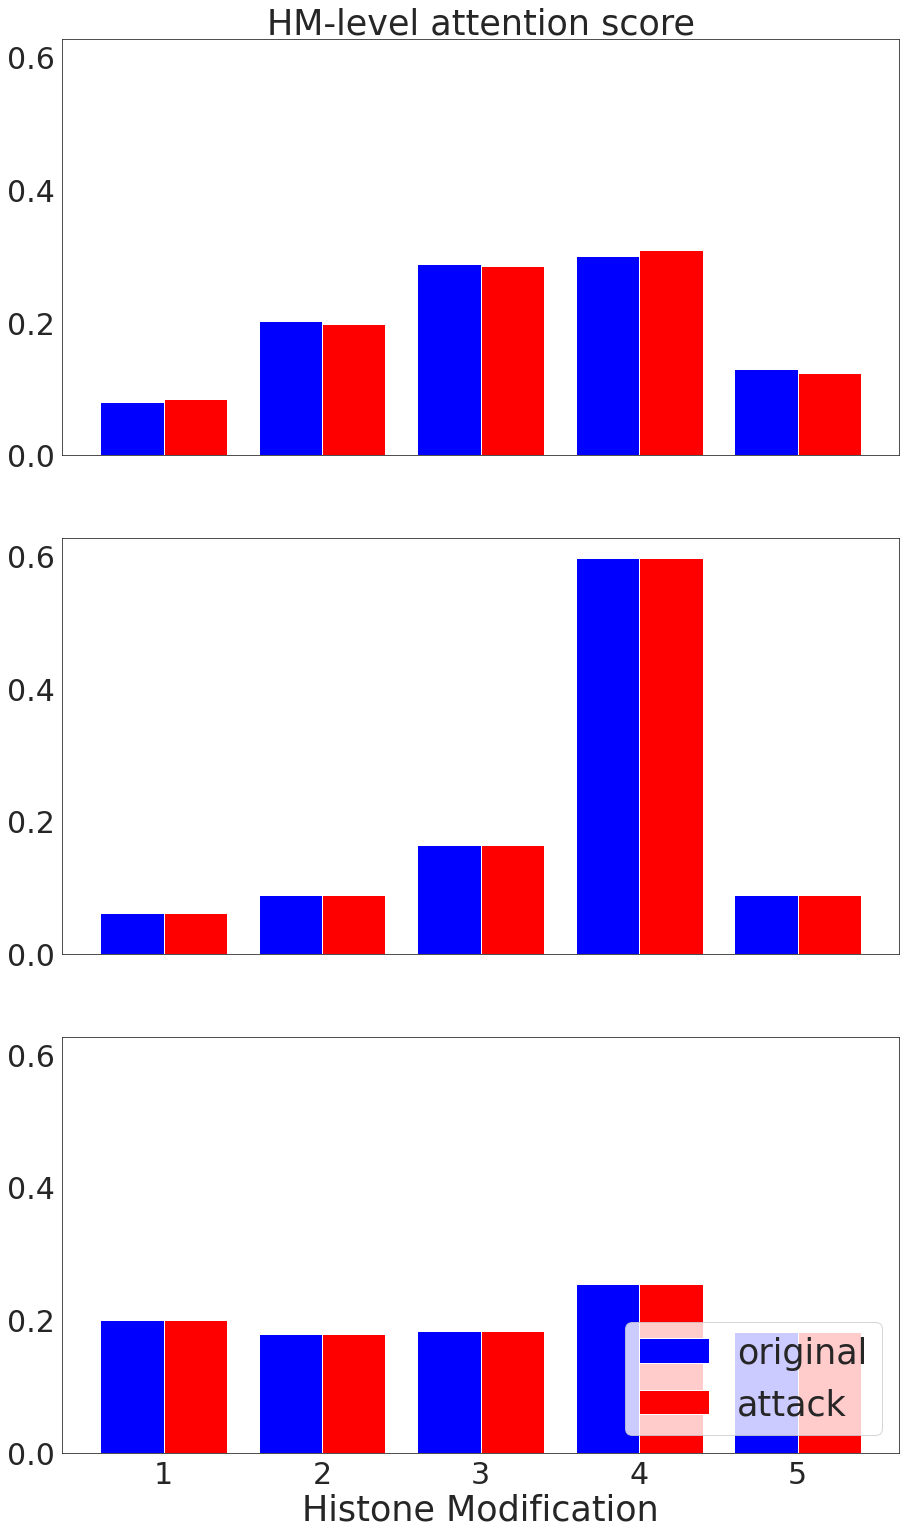

In [69]:
# CHOOSE WHICH GENE TO PLOT (number in range from 0-6599)
GENE_INDEXs = [0, g1, g2, g3]

for GENE_INDEX in GENE_INDEXs:
    
    fig, axes = plt.subplots(3, 1, sharey=True, figsize=(15, 26))
    #fig.suptitle('Cell Line: ' + CELL_LINE + ' , GeneID:' + str(int(df['GeneID'].iloc[g_ind])) + ' , label:' 
    #             + str(int(df['y'].iloc[g_ind])) + ' , original delta pred:' + str(np.abs(np.round(df['yho'].iloc[g_ind]-df['yha'].iloc[g_ind], 3)))
    #             + ' , robust delta pred:' + str(np.abs(np.round(df_robust['yho'].iloc[g_ind]-df_robust['yha'].iloc[g_ind], 3))))

    data = [beta_df.iloc[GENE_INDEX], orig_beta_df.iloc[GENE_INDEX]]
    barWidth = 0.60
    gap = 1.5
    #plt.figure(figsize=(16, 8))
    colors = ['blue', 'red']
    labels = ['original', 'attack']
    for i, results in enumerate(data):
        r = np.arange(len(results)) * gap + i * barWidth
        axes[0].bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels[i], linewidth=[1 for _ in results])
    
    plt.sca(axes[0])
    plt.title('HM-level attention score')
    #plt.title('HM-Level Attention Original - ' + 'Cell Line: ' + CELL_LINE + ' , GeneID:' + str(beta_df.index[GENE_INDEX]))
    plt.xticks([r * gap + 1/len(data) * barWidth for r in range(len(results))], np.arange(1,6))
    
    data = [beta_df_robust.iloc[GENE_INDEX], orig_beta_df_robust.iloc[GENE_INDEX]]
    barWidth = 0.60
    gap = 1.5
    #plt.figure(figsize=(16, 8))
    colors = ['blue', 'red']
    labels = ['original', 'attack']
    for i, results in enumerate(data):
        r = np.arange(len(results)) * gap + i * barWidth
        axes[1].bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels[i], linewidth=[1 for _ in results])

    plt.sca(axes[1])
    #plt.title('HM-Level Attention Robust - ' + 'Cell Line: ' + CELL_LINE + ' , GeneID:' + str(beta_df.index[GENE_INDEX]))
    plt.xticks([r * gap + 1/len(data) * barWidth for r in range(len(results))], np.arange(1,6))
    
    data = [beta_df_thresh9.iloc[GENE_INDEX], orig_beta_df_thresh9.iloc[GENE_INDEX]]
    barWidth = 0.60
    gap = 1.5
    #plt.figure(figsize=(16, 8))
    colors = ['blue', 'red']
    labels = ['original', 'attack']
    for i, results in enumerate(data):
        r = np.arange(len(results)) * gap + i * barWidth
        axes[2].bar(r, results, color=colors[i], width=barWidth, edgecolor='white', label=labels[i], linewidth=[1 for _ in results])

    plt.sca(axes[2])
    #plt.title('HM-Level Attention Threshold - ' + 'Cell Line: ' + CELL_LINE + ' , GeneID:' + str(beta_df.index[GENE_INDEX]))
    plt.xticks([r * gap + 1/len(data) * barWidth for r in range(len(results))], np.arange(1,6))

    for ax in axes.flat:
        ax.set(xlabel='Histone Modification')
        plt.legend(loc='lower right')


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axes.flat:
        ax.label_outer()
        
    plt.savefig(CELL_LINE + '_' + str(int(df['GeneID'].iloc[GENE_INDEX*100])) + '_HM-attn')


# plot avg statistics across all genes in all cells
- I want to show that HM 1 and 5 are the key causes of lack of robustness --> need to show that on average attention for those 2 bins is what flip flops (correlation of that with high attack efficacy) AND/OR that adverarial training and thresholding reduce the attention to these.
- show the scatter plot shown above for other cell lines - pick a couple ranged across the AUC performance spectra and also attack effectiveness spectra (i.e. delta-AUC)

Number of cell lines: 55


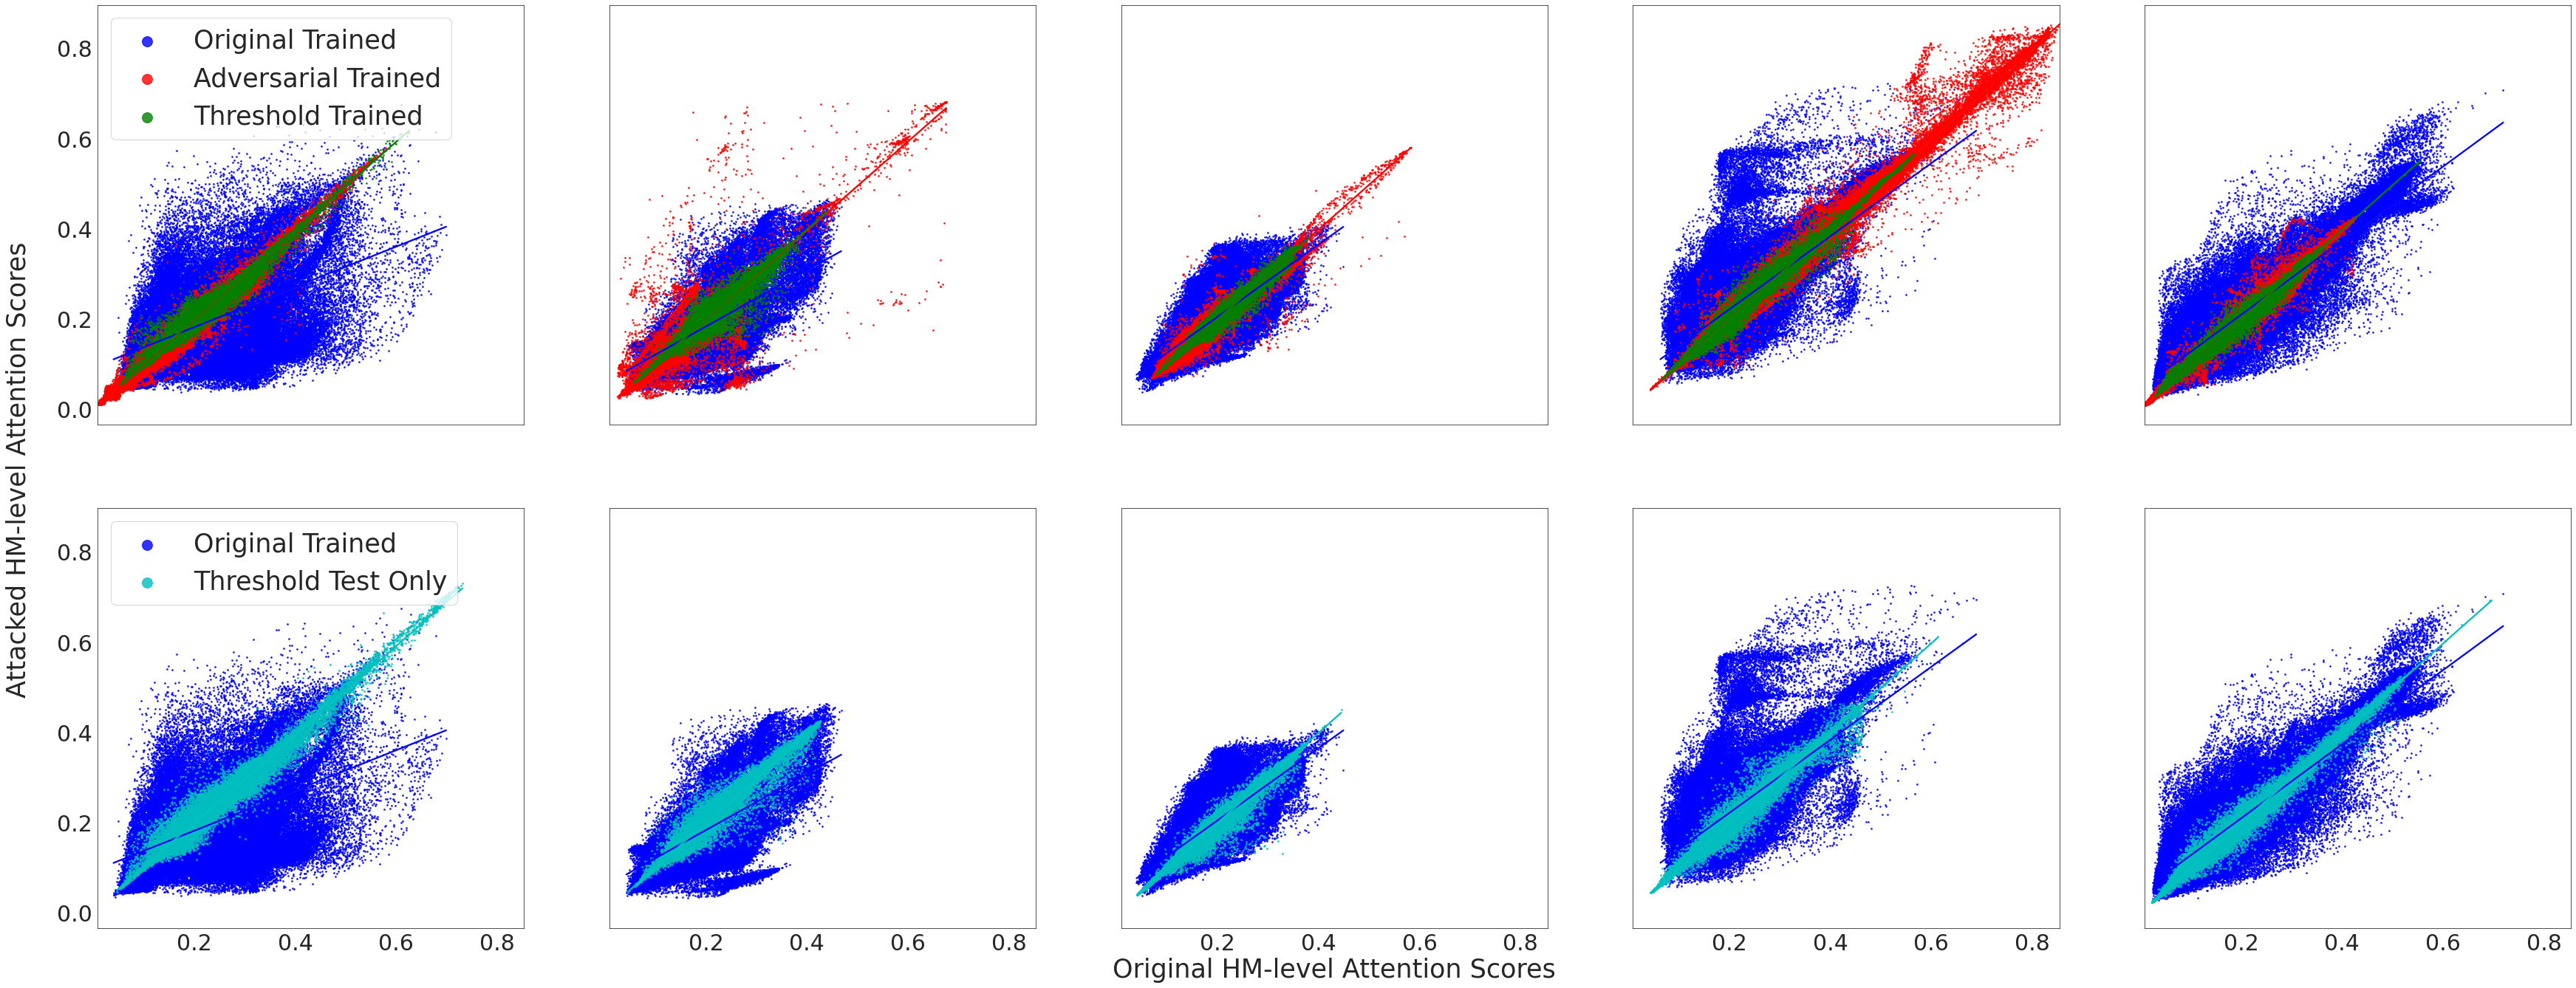

<Figure size 432x288 with 0 Axes>

In [29]:
path = './data/'

dir_list = []
for dir in sorted(os.listdir(path)):
    if dir == 'E059':
        continue
    dir_list.append(dir)

print("Number of cell lines:", len(dir_list))

for i in range(len(dir_list)):
    cell_line = dir_list[i]
    
    if i == 0:
        beta_df = pd.read_csv('./Results_all_fgsm/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)
        orig_beta_df = pd.read_csv('./Results_all_fgsm/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
        beta_df_robust = pd.read_csv('./Results_all_adv_trained/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)
        orig_beta_df_robust = pd.read_csv('./Results_all_adv_trained/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
        beta_df_thresh9 = pd.read_csv('./Results_all_threshold_trained/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)
        orig_beta_df_thresh9 = pd.read_csv('./Results_all_threshold_trained/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
        beta_df_thresh9test = pd.read_csv('./Results_all_threshold_test_only/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)
        orig_beta_df_thresh9test = pd.read_csv('./Results_all_threshold_test_only/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)
    else:
        beta_df = pd.concat([beta_df, pd.read_csv('./Results_all_fgsm/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)])
        orig_beta_df = pd.concat([orig_beta_df, pd.read_csv('./Results_all_fgsm/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)])
        beta_df_robust = pd.concat([beta_df_robust, pd.read_csv('./Results_all_adv_trained/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)])
        orig_beta_df_robust = pd.concat([orig_beta_df_robust, pd.read_csv('./Results_all_adv_trained/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)])
        beta_df_thresh9 = pd.concat([beta_df_thresh9, pd.read_csv('./Results_all_threshold_trained/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)])
        orig_beta_df_thresh9 = pd.concat([orig_beta_df_thresh9, pd.read_csv('./Results_all_threshold_trained/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)])
        beta_df_thresh9test = pd.concat([beta_df_thresh9test, pd.read_csv('./Results_all_threshold_test_only/' + cell_line + '/' + cell_line + '_attchrome/beta_attention.txt', header=None, index_col=0)])
        orig_beta_df_thresh9test = pd.concat([orig_beta_df_thresh9test, pd.read_csv('./Results_all_threshold_test_only/' + cell_line + '/' + cell_line + '_attchrome/orig_beta_attention.txt', header=None, index_col=0)])        
        
fig, axes = plt.subplots(2, 5, figsize=(60,23), sharex = True, sharey = True, facecolor='w', edgecolor='k')
sns.set_style(style='white') #style='white' or 'darkgrid'
plt.sca(axes[1,2])
plt.xlabel("Original HM-level Attention Scores")

fig.text(0.1, 0.5, 'Attacked HM-level Attention Scores', ha='center', va='center', rotation='vertical')

for i in range(5):
    sns.regplot(x=np.array(orig_beta_df[i+1]), y=np.array(beta_df[i+1]), color='b', scatter_kws={'s':3}, label='Original Trained', ax=axes[0,i])
    sns.regplot(x=np.array(orig_beta_df[i+1]), y=np.array(beta_df[i+1]), color='b', scatter_kws={'s':3}, label='Original Trained', ax=axes[1,i])
    sns.regplot(x=np.array(orig_beta_df_robust[i+1]), y=np.array(beta_df_robust[i+1]), color='r', scatter_kws={'s':3}, label='Adversarial Trained', ax=axes[0,i])
    sns.regplot(x=np.array(orig_beta_df_thresh9[i+1]), y=np.array(beta_df_thresh9[i+1]), color='g', scatter_kws={'s':3}, label='Threshold Trained', ax=axes[0,i])
    sns.regplot(x=np.array(orig_beta_df_thresh9test[i+1]), y=np.array(beta_df_thresh9test[i+1]), color='c', scatter_kws={'s':3}, label='Threshold Test Only', ax=axes[1,i])
    #sns.regplot(x=np.array(orig_beta_df_thresh9[i+1]), y=np.array(beta_df_thresh9[i+1]), color='g', scatter_kws={'s':3}, label='Threshold Trained', ax=axes[1,i])

    
plt.sca(axes[0,0])
plt.legend(loc="upper left", markerscale=8)

plt.sca(axes[1,0])
plt.legend(loc="upper left", markerscale=8)


plt.savefig('All_Cells_HM-attn')
plt.show()
plt.cla()   # Clear axis
plt.clf()   # Clear figure